# S03 T02: Visualització gràfica de Múltiples variables
## Luis Pardina - Data Science - 07/abril/2022
### *Exercici 1* : Realitza la pràctica del notebook a GitHub '03 EXAMINING DATA' amb seaborn i el dataset 'tips'. 

Importo les llibreries i genero un DataFrame amb la informació de la base de dades:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
tips = pd.read_csv('tips.csv')

Examino les característiques principals: camps, dimensió, resum estadístic de les dades numèriques, valors de les dades categorìques...

In [2]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [3]:
tips.shape

(244, 7)

In [4]:
tips.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [5]:
tips.dtypes

total_bill    float64
tip           float64
sex            object
smoker         object
day            object
time           object
size            int64
dtype: object

In [6]:
tips.sex.unique()

array(['Female', 'Male'], dtype=object)

In [7]:
tips.smoker.unique()

array(['No', 'Yes'], dtype=object)

In [8]:
tips.day.unique()

array(['Sun', 'Sat', 'Thur', 'Fri'], dtype=object)

In [9]:
tips.time.unique()

array(['Dinner', 'Lunch'], dtype=object)

In [10]:
tips.describe().round(2)

,total_bill,tip,size
count,244.00,244.00,244.00
mean,19.79,3.00,2.57
std,8.90,1.38,0.95
min,3.07,1.00,1.00
25%,13.35,2.00,2.00
50%,17.80,2.90,2.00
75%,24.13,3.56,3.00
max,50.81,10.00,6.00


In [11]:
tips.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

__Resum__: La base de dades conté 244 registres, es podria tractar d' àpats a un restaurant, on s'informa del cost total de l'àpat, de la propina deixada, del sexe dels comensals, de si la taula és o no de fumadors, del dia de la setmana, de si és un dinar o un sopar, i de la mida de la taula o numero de comensals. No hi ha camps buits.

In [12]:
#reanomeno la columna dita 'size' com a 'size_num' per a evitar ambigüitats
tips.rename(columns={
                'size': 'size_num',
            }, inplace=True)

Visualitzo la relació entre les propines ('tip') i el cost de l'àpat ('total_bill'), i entre les propines i el numero de comensals (size_num), amb 2 *scatter plots* que genero amb matplotlib.pyplot. S'observa al primer gràfic una mica de correlació positiva entre la quantitat deixada com a propina i l'import de l'àpat.

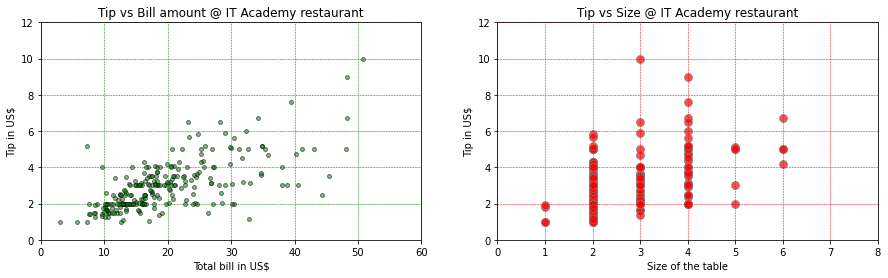

In [13]:
fig = plt.figure(figsize=(15,4))

ax1 = fig.add_subplot(1, 2, 1)

x = tips.total_bill
y = tips.tip
colors = 'Green'
area = np.pi*5

plt.axis([0, 60, 0, 12])

ax1.scatter(x, y, s=area, c=colors, alpha=0.5, edgecolors='black')

plt.title('Tip vs Bill amount @ IT Academy restaurant')
plt.ylabel('Tip in US$')
plt.xlabel('Total bill in US$')
plt.grid(axis = 'x')
plt.grid(color = 'Green', linestyle = '--', linewidth = 0.5)

ax2 = fig.add_subplot(1, 2, 2)

x = tips.size_num
y = tips.tip
colors = "Red"
area = np.pi*20
plt.axis([0,8,0,12])

# Plot
ax2.scatter(x, y, s=area, c=colors, alpha=0.7, edgecolors='grey')
plt.title('Tip vs Size @ IT Academy restaurant')
plt.ylabel('Tip in US$')
plt.xlabel('Size of the table')
plt.grid(axis = 'x')
plt.grid(color = 'Red', linestyle = '--', linewidth = 0.5)


Visualitzo les relacions entre totes les variables numèriques dues a dues amb un *pairplot* de Seaborn. A l'eix diagonal de dalt a a baix es presenten els histogrames de cada variable. Es pot veure a l'histograma de l'import de l' àpat (total_bill) que te biaix cap a la dreta.

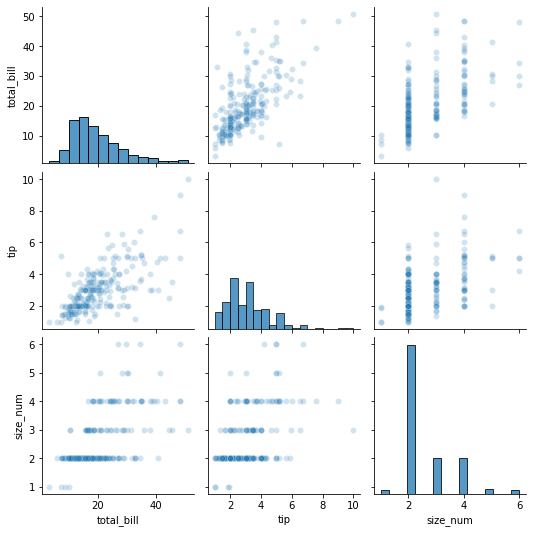

In [14]:
# Matrix Plot identify total_bill skewed to the positive ennnd
sns.pairplot(tips, diag_kind='hist', plot_kws={'alpha': 0.2});

Torno a presentar amb més detall l'histograma de les propines ('tip'). També té biaix cap a la dreta. Hi ha dos pics, pero gosaria dir que no és bimodal perque els dos pics estan molt a prop. Presento mitja, desviació estàndar i mediana de les propines:

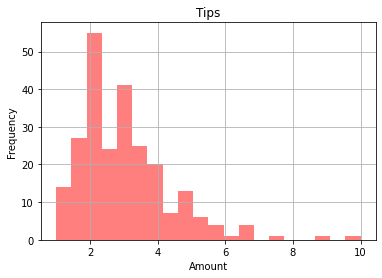

In [15]:
tips.hist(['tip'], bins=20, color = "Red", alpha=0.5)
plt.title('Tips')
plt.ylabel('Frequency')
plt.xlabel('Amount');

In [16]:
tips.tip.mean()

2.9982786885245902

In [17]:
tips.tip.std()

1.3836381890011826

In [18]:
(tips['tip']).median()

2.9

Presento una superposició de dues representacions gràfiques de les propines, un *boxplot* amb la mitjana a 2.99, quartils inferior i superior, max, min i els outliers. I un *swarmplot* on es poden veure totes les dades individuals. 

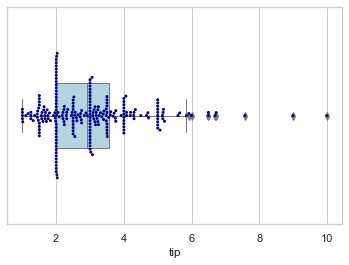

In [21]:
sns.set(style="whitegrid")
sns.boxplot(x="tip", data=tips,  color='lightblue', fliersize=5,  orient='h', linewidth=1 , width=0.3)
sns.swarmplot(x="tip", data=tips, color="darkblue", orient="h", size=3);

Afegeixo una columna al df amb el percentatge que representa la propina (tip_pct) respecte de l'import total de l'àpat.

In [22]:
tips['tip_pct'] = round((tips['tip'] / (tips['total_bill'] - tips['tip']))*100, 2)
tips.head()

,total_bill,tip,sex,smoker,day,time,size_num,tip_pct
0,16.99,1.01,Female,No,Sun,Dinner,2,6.32
1,10.34,1.66,Male,No,Sun,Dinner,3,19.12
2,21.01,3.50,Male,No,Sun,Dinner,3,19.99
3,23.68,3.31,Male,No,Sun,Dinner,2,16.25
4,24.59,3.61,Female,No,Sun,Dinner,4,17.21


Visualitzo amb un *barplot* el percentatge de propina ('tip_pct') segons el dia de la setmana com a dada categòrica. Cada columna representa la mitja del dia i la línia negra l'interval de confiança.

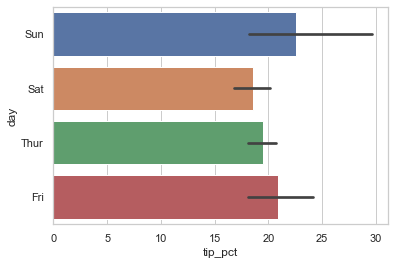

In [23]:
sns.barplot(x='tip_pct', y='day', data=tips, orient="h");

Visualitzo la mateixa informació amb un *barplot*, afegint a més la variable categorica 'time', que separa les dades segons es tracti d'un dinar o un sopar.

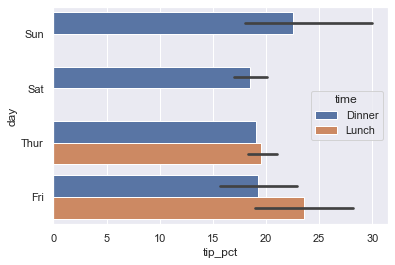

In [31]:
sns.barplot(x='tip_pct', y='day', hue='time', data=tips, orient='h')
sns.set(style="darkgrid")

Presento les característiques de totes les variables, numèriques i categòriques, incloent la nova variable numèrica generada, 'tip_pct':

In [37]:
round(tips.describe(include='all'), 2)

,total_bill,tip,sex,smoker,day,time,size_num,tip_pct
count,244.00,244.00,244,244,244,244,244.00,244.00
unique,NaN,NaN,2,2,4,2,NaN,NaN
top,NaN,NaN,Male,No,Sat,Dinner,NaN,NaN
freq,NaN,NaN,157,151,87,176,NaN,NaN
mean,19.79,3.00,NaN,NaN,NaN,NaN,2.57,20.21
std,8.90,1.38,NaN,NaN,NaN,NaN,0.95,16.34
min,3.07,1.00,NaN,NaN,NaN,NaN,1.00,3.70
25%,13.35,2.00,NaN,NaN,NaN,NaN,2.00,14.83
50%,17.80,2.90,NaN,NaN,NaN,NaN,2.00,18.31
75%,24.13,3.56,NaN,NaN,NaN,NaN,3.00,23.68


In [38]:
round((tips['tip_pct']).median(),3)

18.31

Exploro diferents visualitzacions de la nova columna creada amb el % de propina respecte del compte, 'tip_pct'. Primer un *boxplot* separant per variables categòriques 'day' i 'time'. Hi ha un cas (és un outlier) que la propina suposa un 245% del compte (és el màxim), el trec del gràfic per a evitar una escala massa gran.

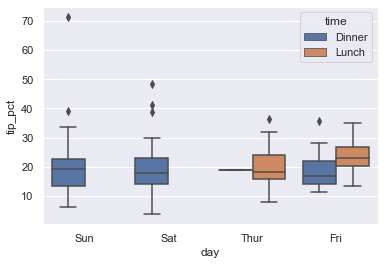

In [43]:
sns.boxplot(x='day', y='tip_pct', hue='time', 
               data=tips[tips.tip_pct < 245]);

Mateixa informació, pero agregant dos gràfics segons la variable categòrica 'smoker' (Yes/No)

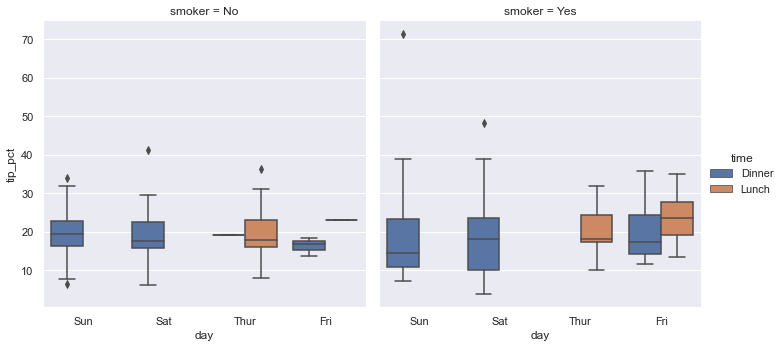

In [44]:
sns.catplot(x='day', y='tip_pct', hue='time', col='smoker',
               kind='box', data=tips[tips.tip_pct < 245]);

Ara una representació gràfica tipus scatter de dues variables numèriques, 'total_bill' i 'tip', cada dada individual mostra amb la color la variable categorica 'smoker' i amb el tamany la variable 'size_num'

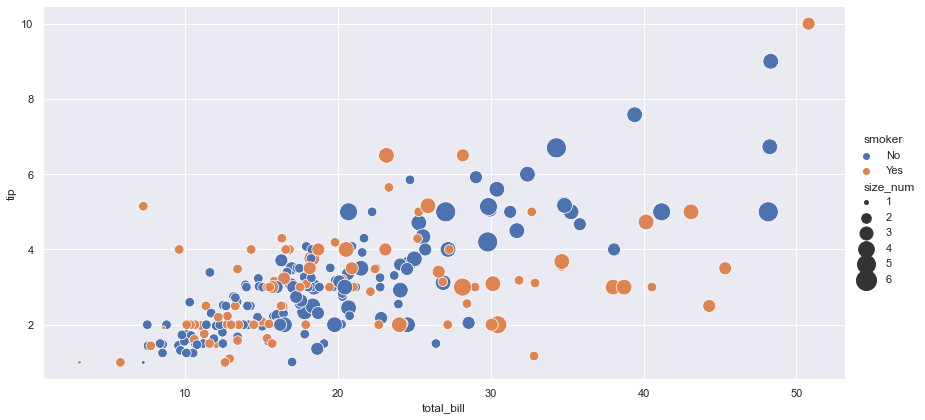

In [141]:
sns.relplot(data=tips, x="total_bill", y="tip", hue = "smoker", size ='size_num', sizes=(15, 400), height = 6, aspect = 2);

Ara repeteixo la representació gràfica tipus scatter de dues variables numèriques, 'total_bill' i 'tip', pero cada dada individual mostra amb la color la variable categorica 'sex' i amb el tamany la variable 'size_num'


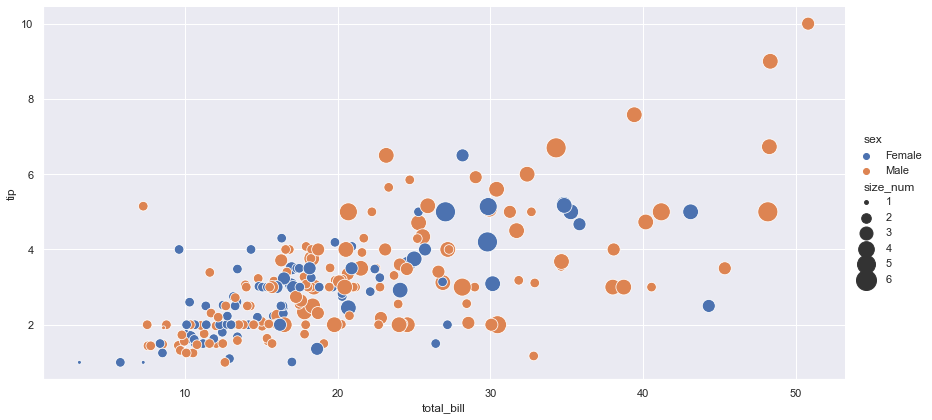

In [142]:
sns.relplot(data=tips, x="total_bill", y="tip", hue = "sex", size ='size_num', sizes=(15, 400), height = 6, aspect = 2);

Canvio l'eix de les y pel percentatge de propina, 'tip_pct':

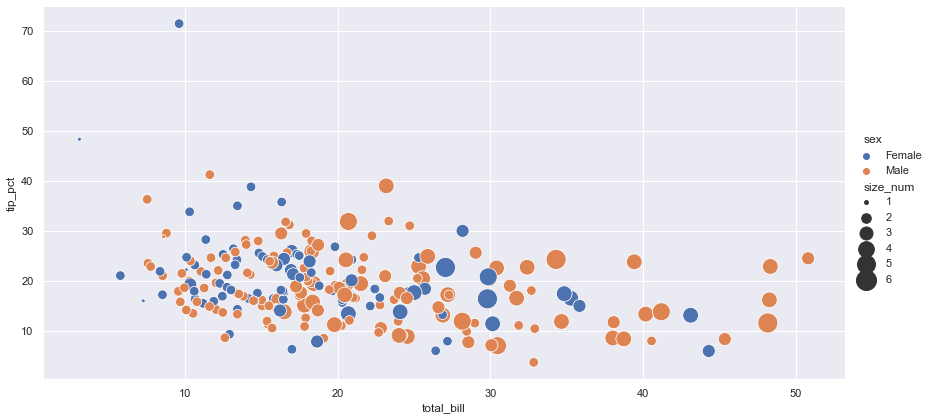

In [45]:
sns.relplot(data=tips[tips.tip_pct < 245], x="total_bill", y="tip_pct", hue = "sex", size ='size_num', sizes=(15, 400), height = 6, aspect = 2);

I per a acabar, una representació gràfica amb cinc variables:

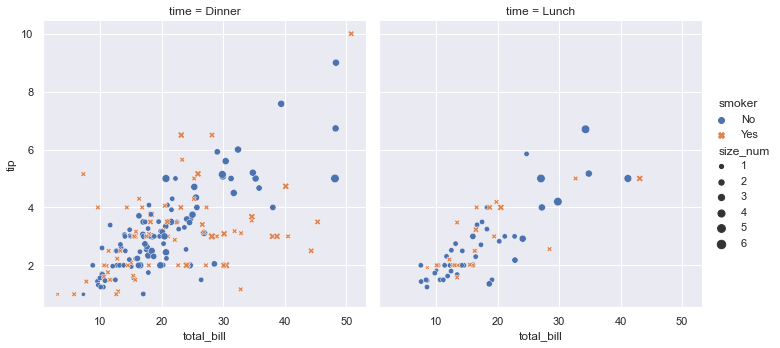

In [46]:
sns.relplot(
    data=tips,
    x="total_bill", y="tip", col="time",
    hue="smoker", style="smoker", size="size_num",
);